In [69]:
import pandas as pd

# 加载elon_elat_data.csv文件和浙江交通栅格.csv文件
elon_elat_data = pd.read_csv(r'D:\花旗数据集\hq2020.csv')
grid_data = pd.read_csv(r'C:\Users\21523\Desktop\newyork_commerce1.csv')
elon_elat_data = elon_elat_data[['end_station_longitude', 'end_station_latitude', 'gender']]

# 假设elon_elat_data.csv文件里有elon和elat两列分别代表经度和纬度
# 假设浙江交通栅格.csv文件里有四列：min_lon、max_lon、min_lat、max_lat

# 筛选在栅格范围内的数据点
filtered_data = pd.DataFrame()
for index, row in grid_data.iterrows():
    grid_min_lon = row['min_lon']
    grid_max_lon = row['max_lon']
    grid_min_lat = row['min_lat']
    grid_max_lat = row['max_lat']
    
    grid_filtered_data = elon_elat_data[(elon_elat_data['end_station_longitude'] >= grid_min_lon) & 
                                         (elon_elat_data['end_station_longitude'] <= grid_max_lon) & 
                                         (elon_elat_data['end_station_latitude'] >= grid_min_lat) & 
                                         (elon_elat_data['end_station_latitude'] <= grid_max_lat)]
    
    filtered_data = pd.concat([filtered_data, grid_filtered_data])
    
# 将时间列解析为datetime类型
#filtered_data['stoptime'] = pd.to_datetime(filtered_data['stoptime'])

# 提取年月日并覆盖原始列
#filtered_data['stoptime'] = filtered_data['stoptime'].dt.strftime('%Y-%m-%d')

# 输出筛选结果
print("筛选结果:")
print(filtered_data)

# 计算gender列里面1跟2的数量，1代表男性，2代表女性，0的数据列去除，计算1跟2分别占有的比例
# 统计性别标签为1和2的数量，排除性别标签为0的行
gender_counts = filtered_data[filtered_data['gender'].isin([1, 2])]['gender'].value_counts()

# 计算比例
total_count = gender_counts.sum()
gender_proportions = gender_counts / total_count

# 打印数量和比例
print("\n性别数量:")
print(gender_counts)
print("\n性别比例:")
print(gender_proportions)

筛选结果:
          end_station_longitude  end_station_latitude  gender
390                  -73.983625             40.694749       1
831                  -73.983625             40.694749       1
922                  -73.987167             40.695065       1
1011                 -73.983625             40.694749       1
1317                 -73.983625             40.694749       1
...                         ...                   ...     ...
19506641             -73.981918             40.769155       0
19506691             -73.973715             40.764397       2
19506732             -73.981918             40.769155       1
19506813             -73.979069             40.766741       1
19506849             -73.981923             40.765265       1

[4250050 rows x 3 columns]

性别数量:
gender
1    2793041
2    1038643
Name: count, dtype: int64

性别比例:
gender
1    0.728933
2    0.271067
Name: count, dtype: float64


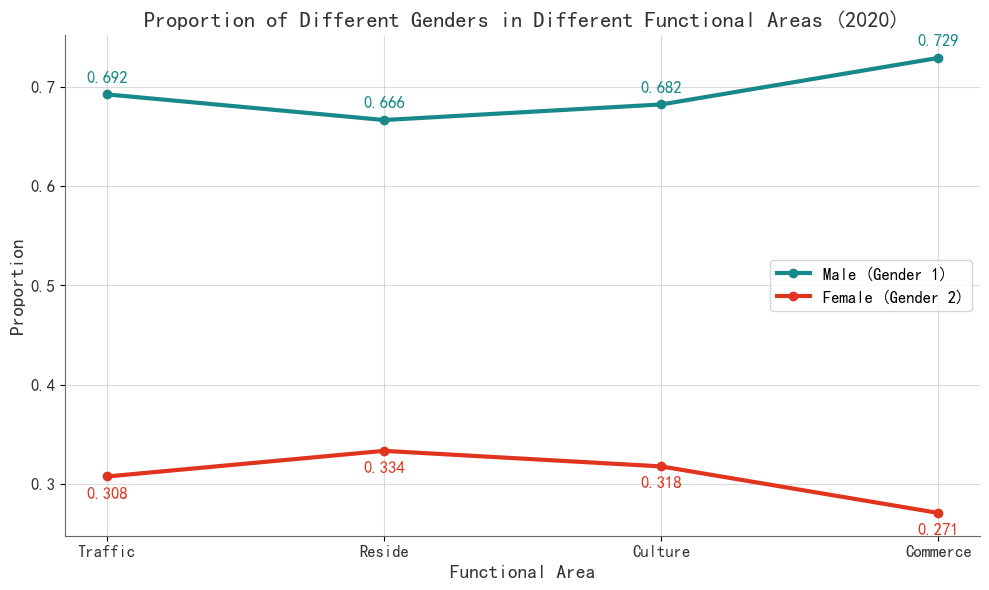

In [70]:
import matplotlib.pyplot as plt
import os

# 数据
categories = ['Traffic', 'Reside', 'Culture', 'Commerce']
gender_1 = [0.692231, 0.666433, 0.682091, 0.728933]
gender_2 = [0.307769, 0.333567, 0.317909, 0.271067]

# 绘图
plt.figure(figsize=(10, 6))

plt.plot(categories, gender_1, marker='o', label='Male (Gender 1)', color='#18898A', linewidth=3)  # 加粗线条
plt.plot(categories, gender_2, marker='o', label='Female (Gender 2)', color='#E1341E', linewidth=3)  # 加粗线条

# 添加数据标签
for i in range(len(categories)):
    plt.text(categories[i], gender_1[i] + 0.01, f'{gender_1[i]:.3f}', ha='center', va='bottom', fontsize=12, color='#18898A')
    plt.text(categories[i], gender_2[i] - 0.01, f'{gender_2[i]:.3f}', ha='center', va='top', fontsize=12, color='#E1341E')

# 添加标签和标题
plt.xlabel('Functional Area', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Proportion', fontsize=14, fontweight='bold', color='#333333')
plt.title('Proportion of Different Genders in Different Functional Areas (2020)', fontsize=16, fontweight='bold', color='#333333')
plt.legend(fontsize=12)

# 美化坐标轴刻度和标签
plt.xticks(fontsize=12, color='#333333')  # 加深横坐标颜色
plt.yticks(fontsize=12, color='#333333')  # 加深纵坐标颜色

# 添加网格线，实线
plt.grid(True, linestyle='-', color='#CCCCCC', alpha=0.7)

# 添加阴影效果
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('#666666')  # 加深横坐标颜色
plt.gca().spines['left'].set_color('#666666')    # 加深纵坐标颜色

# 保存图形到桌面
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')
file_path = os.path.join(desktop_path, 'gender_proportion_plot_2020.png')
plt.savefig(file_path)

# 显示图形
plt.tight_layout()
plt.show()